In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Central Limit Theorem Example
This is a simple example that demonstrates the central limit theorem, which states that the distribution of the means of $n$ independent random variables of any unspecified PDF approaches a gaussian PDF for large $n$.

In [2]:
np.random.seed(29374)

In [3]:
x=np.random.uniform(0, 1, 2)   # generate 2 random numbers from [0,1]

In [4]:
# The expected mean is 1/2.  The sample mean is close to 1/2.
print(x)
print(np.mean(x))

[0.59210015 0.39194047]
0.49202030668541713


Now let's generate 100,000 pairs ($n = 2$) of random numbers from a uniform distribution and look at the **distributions of the means**.

In [5]:
n      = 2
nsims  = 100000
means2 = np.zeros(nsims)  # this will store the 100,000 mean values
for i in range(0, nsims):
    x = np.random.uniform(0, 1, n)
    means2[i] = np.mean(x)

And let's calculate the standard deviation of the means relative to 1/2.  We expect this standard deviation to be:

$$ \sigma = \sqrt{\frac{1}{12n}} = \sqrt{\frac{1}{24}} = 0.204$$

In [6]:
std2 = np.std(means2)
print(std2)

0.20372075708018939


The central limit theorem says that this distribution of the means should approach a gaussian with mean $\mu = 0.5$ and $\sigma^2 = 1/(12n)$ for large $n$.  Let's compare the actual distribution of the means with a gaussian.

<function matplotlib.pyplot.show(close=None, block=None)>

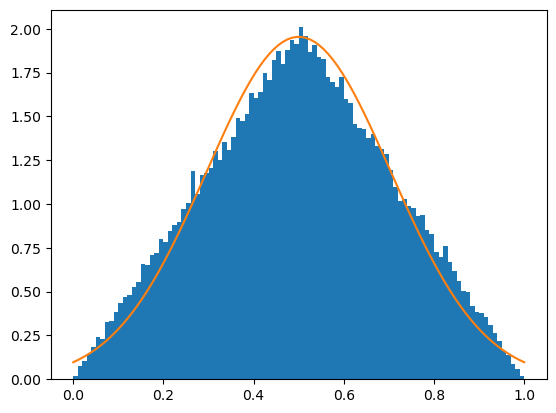

In [7]:
a,b,c = plt.hist(means2, range=[0,1], bins=100,
                 histtype='bar', density=True)
x2 = np.linspace(0, 1.0, 100)
y2 = stats.norm.pdf(x2, 0.5, 1/np.sqrt(n*12))
plt.plot(x2, y2)
plt.show

Same as above for $n=4$.  The distribution of the means will start to look more like a gaussian.

<function matplotlib.pyplot.show(close=None, block=None)>

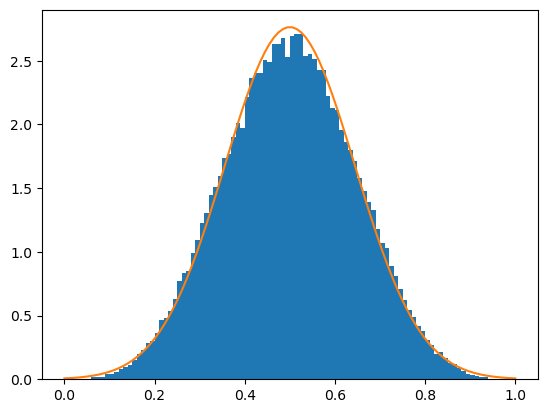

In [8]:
n      = 4
nsims  = 100000
means2 = np.zeros(nsims)
for i in range(0,nsims):
    x = np.random.uniform(0, 1, n)
    means2[i] = np.mean(x)
a,b,c = plt.hist(means2, range=[0,1], bins=100,
                 histtype='bar', density=True)
x4 = np.linspace(0, 1.0, 100)
y4 = stats.norm.pdf(x4, 0.5, 1/np.sqrt(n*12))
plt.plot(x4, y4)
plt.show

And $n=10$.

<function matplotlib.pyplot.show(close=None, block=None)>

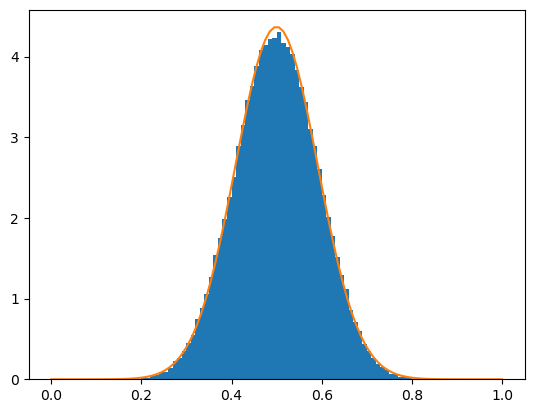

In [9]:
n      = 10
nsims  = 100000
means2 = np.zeros(nsims)
for i in range(0, nsims):
    x = np.random.uniform(0, 1, n)
    means2[i] = np.mean(x)
a,b,c = plt.hist(means2, range=[0,1], bins=100,
                 histtype='bar', density=True)
x10 = np.linspace(0, 1.0, 100)
y10 = stats.norm.pdf(x10, 0.5, 1/np.sqrt(n*12))
plt.plot(x10, y10)
plt.show

It works for other PDFs, e.g., the exponential distribution $$f(x|\beta) = \frac{1}{\beta} e^{-x/\beta}$$ which has mean and variance of $$\mu = \beta$$ $$\sigma^2 = \beta^2$$

<function matplotlib.pyplot.show(close=None, block=None)>

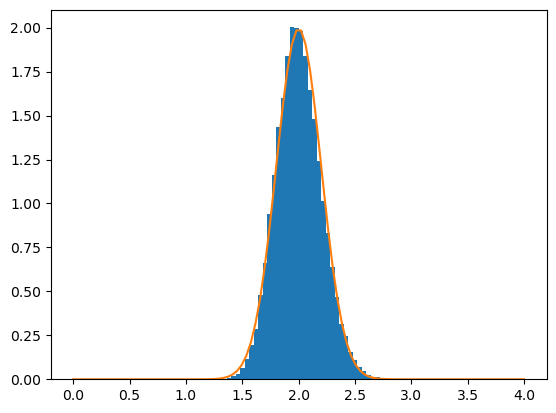

In [10]:
n      = 100
nsims  = 100000
means2 = np.zeros(nsims)
mu  = 2
var = mu*mu
for i in range(0, nsims):
    x = np.random.exponential(mu, n)
    means2[i] = np.mean(x)
a,b,c = plt.hist(means2, range=[0,4], bins=100,
                 histtype='bar', density=True)
x10 = np.linspace(0, 4.0, 100)
y10 = stats.norm.pdf(x10, mu, np.sqrt(var/n))
plt.plot(x10, y10)
plt.show

## Other forms of the Central Limit Theorem

The binomial distribution $p_B(x|n,p)$ has a mean of $\mu = np$ and variance $\sigma^2 = np(1-p)$.  For large values of $np$, the distribution approaches a gaussian distribution with the same mean and variance.

<BarContainer object of 40 artists>

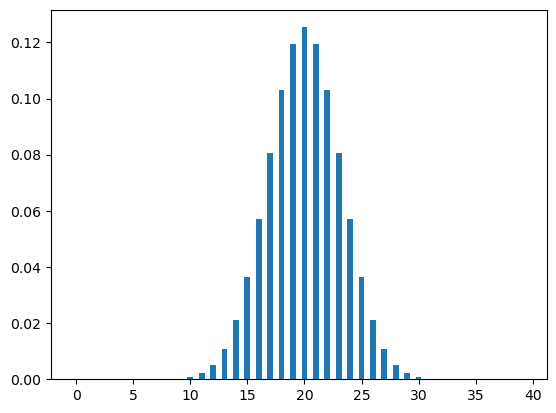

In [11]:
n = 40
p = 0.50
x40 = np.arange(40)
b40 = stats.binom.pmf(x40, n, p)
#print(x40, b40)
plt.bar(x40, b40, width=0.5)

Let's overplot a gaussian with $\mu = np$ and $\sigma = \sqrt{np(1-p}$.

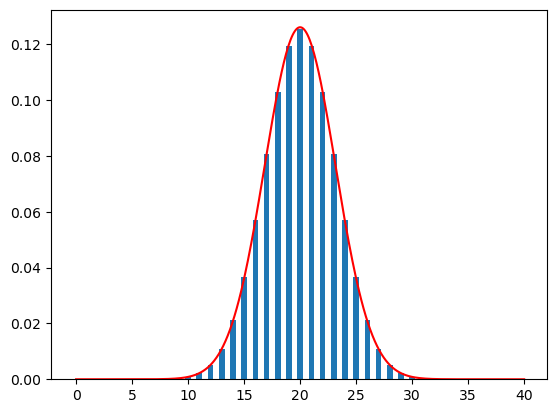

In [12]:
mean40 = n*p
std40  = np.sqrt(n*p*(1-p))
nx40 = np.linspace(0,40,400)
ny40 = stats.norm.pdf(nx40,mean40,std40)

plt.bar(x40, b40, width=0.5)
plt.plot(nx40, ny40, color='r')

Same for the Poisson distribution $p_P(x|\lambda)$, which has mean $\mu = \lambda$ and variance $\sigma^2 = \lambda$.  The distribution approaces a gaussian with same mean and variance at large $\lambda$.

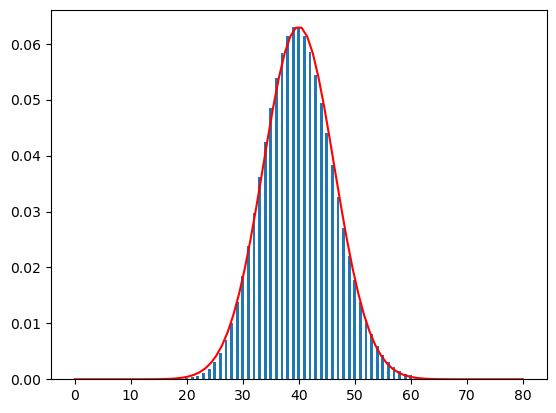

In [13]:
mu = 40
x = np.arange(81)   # = [0 1 .. 80]
p = stats.poisson.pmf(x, mu)

mean = mu
std  = np.sqrt(mu)
nx = np.linspace(0,80,80)
ny = stats.norm.pdf(nx,mean,std)

plt.bar(x, p, width=0.5)
plt.plot(nx, ny, color='r')

This is precisely why the gaussian PDF is appropriate for the likelihood function in many applications.